분석 및 인사이트 내용: https://www.notion.so/19bd5beeb0c0800abd25d04d52fb4e5d

In [1]:
# 라이브러리 설치
!pip install koreanize-matplotlib
!pip install youtube-transcript-api
!pip install google-api-python-client pandas isodate
!pip install pytrends
!pip install pytrends matplotlib
!pip install beautifulsoup4 requests
!pip install konlpy
!pip install ace_tools

# Colab 한글폰트 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
!apt install fonts-nanum fonts-nanum-extra
mpl.font_manager.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
mpl.rc('font', family='NanumGothic')
plt.rc("axes", unicode_minus=False)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.3/622.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 30.7 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-extra
0 upgraded, 2 newly installed, 0 to remove and 20 not upgraded.
Need to get 31.4 MB of archives.
After this operation, 120 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-extra all 20200506-1 [21.0 MB]
Fetched 31.4 MB in 3s (11.8 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 124926 files and directories curre

In [3]:
# CSV 파일 로드
df = pd.read_csv('ga_innercircle_parsed_250212.csv')

# 숫자형 컬럼과 범주형 컬럼 구분
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# 숫자형 데이터 기초 통계
print("숫자형 데이터 기초 통계:")
print(df[numeric_cols].describe())

# 범주형 데이터 기초 통계
print("\n범주형 데이터 기초 통계:")
print(df[categorical_cols].describe())

# 결측치 확인
print("\n결측치 확인:")
print(df.isnull().sum())

# 컬럼별 고유값 개수
print("\n범주형 컬럼별 고유값 개수:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()}개 고유값")

# 데이터 샘플 출력
print("\n데이터 샘플 (상위 5개 행):")
print(df.head())

<ipython-input-3-cf6d63acd8b7>:2: DtypeWarning: Columns (13,45,46,47,48,50,53,55,59,60,68,78,92,106,115,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ga_innercircle_parsed_250212.csv')


숫자형 데이터 기초 통계:
         event_date  event_timestamp  event_previous_timestamp  \
count  8.470000e+03     8.470000e+03                       0.0   
mean   2.024544e+07     1.736506e+15                       NaN   
std    4.441132e+03     4.767931e+12                       NaN   
min    2.024121e+07     1.730000e+15                       NaN   
25%    2.024122e+07     1.730000e+15                       NaN   
50%    2.024123e+07     1.740000e+15                       NaN   
75%    2.025011e+07     1.740000e+15                       NaN   
max    2.025013e+07     1.740000e+15                       NaN   

       event_value_in_usd  event_bundle_sequence_id  \
count                 0.0              8.470000e+03   
mean                  NaN              4.374880e+07   
std                   NaN              1.235279e+09   
min                   NaN             -2.146546e+09   
25%                   NaN             -9.739845e+08   
50%                   NaN              2.029858e+07   
75%  

In [4]:
import pandas as pd

# CSV 파일 로드
df = pd.read_csv('ga_innercircle_parsed_250212.csv')

# 숫자형 컬럼과 범주형 컬럼 구분
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# 결측치 처리
# 숫자형 데이터는 중앙값으로 대체
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# 범주형 데이터는 최빈값으로 대체
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# 결측치 처리 후 CSV로 저장 (한글 깨짐 방지)
df.to_csv('ga_innercircle_cleaned.csv', index=False, encoding='utf-8-sig')

print("결측치 처리 완료 및 CSV 저장 완료: ga_innercircle_cleaned.csv")


<ipython-input-4-0b23eeaac437>:4: DtypeWarning: Columns (13,45,46,47,48,50,53,55,59,60,68,78,92,106,115,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ga_innercircle_parsed_250212.csv')
<ipython-input-4-0b23eeaac437>:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))


결측치 처리 완료 및 CSV 저장 완료: ga_innercircle_cleaned.csv


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df = pd.read_csv('ga_innercircle_cleaned.csv')

# event_date가 YYYYMMDD 형식으로 되어 있을 경우 변환
df['event_date'] = pd.to_datetime(df['event_date'].astype(str), format='%Y%m%d', errors='coerce')

# 'activation' 이벤트 정의
df['activation'] = df['event_name'].isin(['sign_up', 'account_connect']).astype(int)

# session_start 기준 첫 방문 날짜(코호트) 설정
df['cohort'] = df[df['event_name'] == 'session_start'].groupby('user_pseudo_id')['event_date'].transform('min')

# NaT 값 제거 및 날짜 형식 변환
df = df.dropna(subset=['cohort', 'event_date'])
df['cohort_label'] = df['cohort'].dt.strftime('%Y.%m.%d')  # 연.월.일 형식으로 변환

# 사용자의 최초 방문 후 activation이 없는 경우 이탈로 간주
df['is_churned'] = df.groupby('user_pseudo_id')['activation'].transform('max') == 0

# 코호트 별 7일 이내 이탈률 분석
df['days_since_cohort'] = (df['event_date'] - df['cohort']).dt.days
cohort_data = df[df['days_since_cohort'].between(0, 7)].groupby(['cohort_label', 'days_since_cohort'])['user_pseudo_id'].nunique().unstack()

# 코호트별 유지율 및 이탈률 계산
cohort_size = cohort_data.iloc[:, 0]
retention = cohort_data.divide(cohort_size, axis=0)
churn = 1 - retention

# 히트맵 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(churn, annot=True, fmt='.2%', cmap='Blues', cbar=True, linewidths=0.5)
plt.title('7-Day Churn Cohort Heatmap')
plt.xlabel('Days Since Cohort')
plt.ylabel('Cohort Start Date')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

IndexError: single positional indexer is out-of-bounds

In [6]:
!pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 2.9 MB/s eta 0:00:00


In [7]:
import pandas as pd

# 데이터 불러오기
file_path = "ad_data.csv"  # 파일 경로
df = pd.read_csv(file_path)

# 데이터 기본 정보 요약
basic_info = pd.DataFrame({
    "Column": df.columns,
    "Non-Null Count": df.count().values,
    "Data Type": df.dtypes.values
})

# 결측값 확인
missing_values = pd.DataFrame({
    "Column": df.columns,
    "Missing Values": df.isnull().sum().values,
    "Missing Percentage": (df.isnull().sum() / len(df) * 100).round(2)
})

# 기초 통계량 확인
numeric_summary = df.describe().T.reset_index().rename(columns={"index": "Column"})

# 범주형 변수 개수 확인
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
categorical_counts = pd.DataFrame({
    "Column": categorical_columns,
    "Unique Values": [df[col].nunique() for col in categorical_columns]
})

# 수치형 변수 개별 통계량
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_summary = pd.DataFrame({
    "Column": numerical_columns,
    "Mean": [df[col].mean() for col in numerical_columns],
    "Median": [df[col].median() for col in numerical_columns],
    "Std Dev": [df[col].std() for col in numerical_columns],
    "Min": [df[col].min() for col in numerical_columns],
    "Max": [df[col].max() for col in numerical_columns]
}).round(2)

# 엑셀 파일로 저장 (시트별 저장)
output_file = "ad_data_analysis.xlsx"
with pd.ExcelWriter(output_file, engine="xlsxwriter") as writer:
    basic_info.to_excel(writer, sheet_name="Basic Info", index=False)
    missing_values.to_excel(writer, sheet_name="Missing Values", index=False)
    numeric_summary.to_excel(writer, sheet_name="Numeric Summary", index=False)
    categorical_counts.to_excel(writer, sheet_name="Categorical Counts", index=False)
    numerical_summary.to_excel(writer, sheet_name="Numerical Summary", index=False)

print(f"📂 엑셀 파일 저장 완료: {output_file} (시트별 저장)")


📂 엑셀 파일 저장 완료: ad_data_analysis.xlsx (시트별 저장)


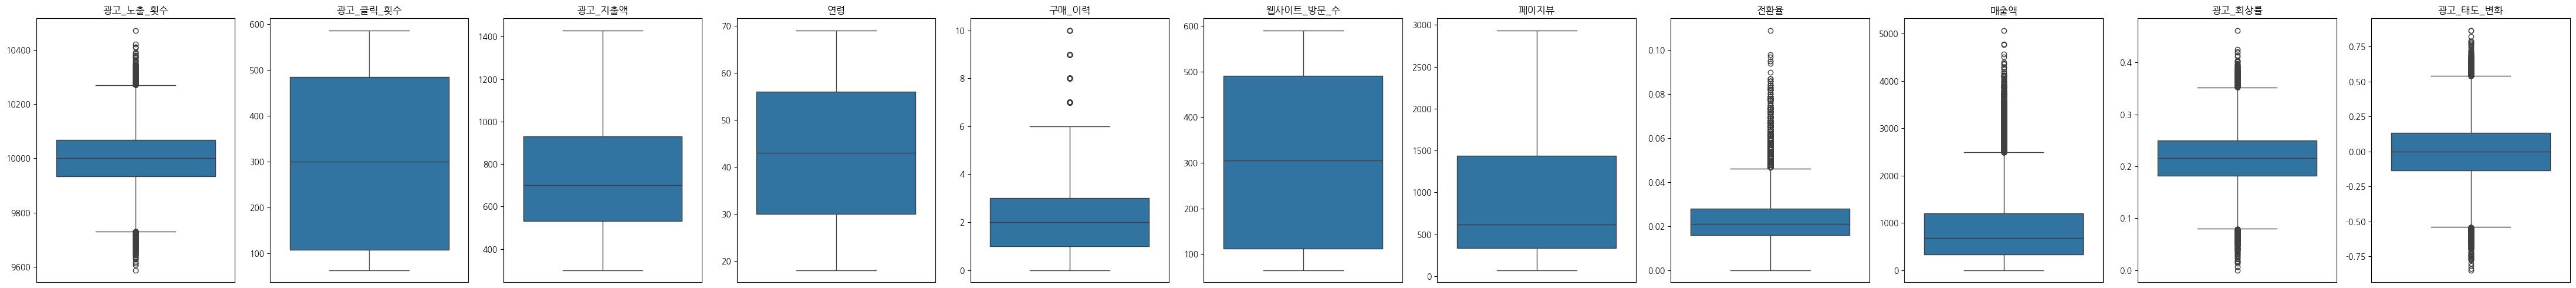

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
file_path = "ad_data.csv"  # 파일 경로
df = pd.read_csv(file_path)

# 수치형 변수 선택
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# 박스플롯 가로 정렬
num_cols = len(numerical_columns)  # 변수 개수
plt.figure(figsize=(num_cols * 4, 5))  # 그래프 크기 설정

for i, col in enumerate(numerical_columns):
    plt.subplot(1, num_cols, i + 1)  # 가로로 나열
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.ylabel("")
    plt.xticks([])

plt.tight_layout()  # 그래프 간격 조정
plt.show()


In [13]:
import pandas as pd

# 데이터 불러오기
file_path = "ad_data.csv"  # 파일 경로
df = pd.read_csv(file_path)

# 날짜 데이터 변환 (기간 계산을 위해)
df["광고_시작일"] = pd.to_datetime(df["광고_시작일"])
df["광고_종료일"] = pd.to_datetime(df["광고_종료일"])

# 기간 (광고 진행 기간)
df["Period"] = (df["광고_종료일"] - df["광고_시작일"]).dt.days
df["Period"] = df["Period"].replace(0, 1)  # 0일 방지 (나눗셈 오류 방지)

# 지표 계산
df["CPM"] = (df["광고_지출액"] / df["광고_노출_횟수"]) * 1000
df["CPC"] = df["광고_지출액"] / df["광고_클릭_횟수"]
df["CTR"] = (df["광고_클릭_횟수"] / df["광고_노출_횟수"]) * 100
df["CVR"] = df["전환율"] * 100
df["Conversion"] = df["광고_클릭_횟수"] * (df["CVR"] / 100)  # 클릭 수에 전환율 적용
df["CPA"] = df["광고_지출액"] / df["Conversion"]
df["Average PV"] = (df["페이지뷰"] / df["웹사이트_방문_수"]) * 100
df["ROAS"] = (df["매출액"] / df["광고_지출액"]) * 100
df["Revenue per Visitor"] = df["매출액"] / df["웹사이트_방문_수"]
df["Revenue per Impression"] = df["매출액"] / df["광고_노출_횟수"]
df["Revenue per Click"] = df["매출액"] / df["광고_클릭_횟수"]
df["Revenue per Conversion"] = df["매출액"] / df["Conversion"]
df["Average_Impression"] = df["광고_노출_횟수"] / df["Period"]
df["Average_Click"] = df["광고_클릭_횟수"] / df["Period"]
df["Average_Cost"] = df["광고_지출액"] / df["Period"]
df["Average_Conversion"] = df["Conversion"] / df["Period"]
df["Average_Revenue"] = df["매출액"] / df["Period"]

# 광고_타겟팅 컬럼을 "연령", "성별", "관심사" 세 개의 열로 나누기
df[["광고_타겟팅(연령)", "광고_타겟팅(성별)", "광고_타겟팅(관심사)"]] = df["광고_타겟팅"].str.split(",", expand=True).iloc[:, :3]

# CSV 파일 저장
output_file = "ad_data_with_metrics_and_targeting.csv"
df.to_csv(output_file, index=False, encoding="utf-8-sig")

print(f"📂 CSV 파일 저장 완료: {output_file}")


📂 CSV 파일 저장 완료: ad_data_with_metrics_and_targeting.csv


In [15]:
import pandas as pd

# 데이터 불러오기
file_path = "ad_data.csv"  # 파일 경로
df = pd.read_csv(file_path)

# 날짜 데이터 변환 (기간 계산을 위해)
df["광고_시작일"] = pd.to_datetime(df["광고_시작일"])
df["광고_종료일"] = pd.to_datetime(df["광고_종료일"])

# 기간 (광고 진행 기간)
df["Period"] = (df["광고_종료일"] - df["광고_시작일"]).dt.days
df["Period"] = df["Period"].replace(0, 1)  # 0일 방지 (나눗셈 오류 방지)

# 광고 성과 지표 계산
df["CPM"] = (df["광고_지출액"] / df["광고_노출_횟수"]) * 1000
df["CPC"] = df["광고_지출액"] / df["광고_클릭_횟수"]
df["CTR"] = (df["광고_클릭_횟수"] / df["광고_노출_횟수"]) * 100
df["CVR"] = df["전환율"] * 100
df["Conversion"] = df["광고_클릭_횟수"] * (df["CVR"] / 100)  # 클릭 수에 전환율 적용
df["CPA"] = df["광고_지출액"] / df["Conversion"]
df["ROAS"] = (df["매출액"] / df["광고_지출액"]) * 100

# 광고_타겟팅 컬럼을 "연령", "성별", "관심사" 세 개의 열로 나누기
df[["광고_타겟팅(연령)", "광고_타겟팅(성별)", "광고_타겟팅(관심사)"]] = df["광고_타겟팅"].str.split(",", expand=True).iloc[:, :3]

# 필요한 컬럼 선택
group_columns = ["광고_채널", "광고_형식", "광고_타겟팅(성별)", "광고_타겟팅(연령)", "광고_타겟팅(관심사)"]
metric_columns = ["CTR", "CVR", "ROAS", "CPM", "CPC", "CPA"]

# 평균값 계산
average_metrics = df[group_columns + metric_columns].groupby(group_columns).mean().reset_index()

# 평균값 출력
print("📌 광고별 평균 성과 지표")
print(average_metrics)


📌 광고별 평균 성과 지표
    광고_채널 광고_형식 광고_타겟팅(성별) 광고_타겟팅(연령) 광고_타겟팅(관심사)       CTR       CVR  \
0     SNS   동영상         남성        20대          요리  2.997869  2.234152   
1     SNS   동영상         남성        20대          패션  2.997068  2.169518   
2     SNS   동영상         남성        30대          건강  3.005304  2.137342   
3     SNS   동영상         남성        30대          여행  2.998683  2.213061   
4     SNS   동영상         남성        30대          음악  3.005599  2.231663   
..    ...   ...        ...        ...         ...       ...       ...   
199   온라인   텍스트         여성        40대          음악  4.996798  2.225000   
200   온라인   텍스트         여성        40대          패션  5.009588  2.167873   
201   온라인   텍스트         여성        50대          건강  5.022231  2.227373   
202   온라인   텍스트         여성        50대          게임  4.999871  2.276180   
203   온라인   텍스트         여성        50대          여행  5.006883  2.171492   

           ROAS        CPM       CPC         CPA  
0    123.391554  69.709224  2.333940         inf  
1    1

In [16]:
import pandas as pd

# 데이터 불러오기
file_path = "ad_data.csv"  # 파일 경로
df = pd.read_csv(file_path)

# 날짜 데이터 변환 (기간 계산을 위해)
df["광고_시작일"] = pd.to_datetime(df["광고_시작일"])
df["광고_종료일"] = pd.to_datetime(df["광고_종료일"])

# 기간 (광고 진행 기간)
df["Period"] = (df["광고_종료일"] - df["광고_시작일"]).dt.days
df["Period"] = df["Period"].replace(0, 1)  # 0일 방지 (나눗셈 오류 방지)

# 광고 성과 지표 계산
df["CPM"] = (df["광고_지출액"] / df["광고_노출_횟수"]) * 1000
df["CPC"] = df["광고_지출액"] / df["광고_클릭_횟수"]
df["CTR"] = (df["광고_클릭_횟수"] / df["광고_노출_횟수"]) * 100
df["CVR"] = df["전환율"] * 100
df["Conversion"] = df["광고_클릭_횟수"] * (df["CVR"] / 100)  # 클릭 수에 전환율 적용
df["CPA"] = df["광고_지출액"] / df["Conversion"]
df["ROAS"] = (df["매출액"] / df["광고_지출액"]) * 100

# 필요한 컬럼만 선택하여 새로운 데이터 프레임 생성
selected_columns = [
    "성별", "연령", "거주_지역", "직업", "관심사",
    "CTR", "CVR", "ROAS", "CPM", "CPC", "CPA"
]

df_selected = df[selected_columns].copy()

# CSV 파일 저장
output_file_selected = "ad_data_demographics_summary.csv"
df_selected.to_csv(output_file_selected, index=False, encoding="utf-8-sig")

print(f"📂 CSV 파일 저장 완료: {output_file_selected}")


📂 CSV 파일 저장 완료: ad_data_demographics_summary.csv


In [22]:
import pandas as pd

# 데이터 불러오기
file_path = "ad_data_with_metrics_and_targeting.csv"  # 파일 경로
df = pd.read_csv(file_path)

# 필요한 컬럼만 선택하여 새로운 데이터 프레임 생성
selected_columns = [
    "광고_시작일", "광고_종료일",
    "CTR", "CVR", "ROAS", "CPM", "CPC", "CPA"
]

df_selected = df[selected_columns].copy()

# CSV 파일 저장
output_file_selected = "ad_data_campaign_summary.csv"
df_selected.to_csv(output_file_selected, index=False, encoding="utf-8-sig")

print(f"📂 CSV 파일 저장 완료: {output_file_selected}")


📂 CSV 파일 저장 완료: ad_data_campaign_summary.csv


In [18]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv("ad_data_with_metrics_and_targeting.csv")

# 피어슨 상관계수 계산 (선형 관계)
pearson_corr = df["광고_태도_변화"].corr(df["ROAS"], method="pearson")

# 스피어만 상관계수 계산 (순위 기반 관계)
spearman_corr = df["광고_태도_변화"].corr(df["ROAS"], method="spearman")

print(f"📌 피어슨 상관계수: {pearson_corr:.4f}")
print(f"📌 스피어만 상관계수: {spearman_corr:.4f}")


📌 피어슨 상관계수: 0.0080
📌 스피어만 상관계수: 0.0066


In [21]:
import pandas as pd

# 데이터 불러오기
file_path = "ad_data_with_metrics_and_targeting.csv"  # 파일 경로
df = pd.read_csv(file_path)

# 피어슨 상관계수 계산 (선형 관계)
pearson_corr = df["광고_회상률"].corr(df["ROAS"], method="pearson")

# 스피어만 상관계수 계산 (순위 기반 관계)
spearman_corr = df["광고_회상률"].corr(df["ROAS"], method="spearman")

print(f"📌 피어슨 상관계수 (ROAS): {pearson_corr:.4f}")
print(f"📌 스피어만 상관계수 (ROAS): {spearman_corr:.4f}")


📌 피어슨 상관계수 (ROAS): 0.0051
📌 스피어만 상관계수 (ROAS): 0.0030
